In [108]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt
 

In [122]:
csv = pd.read_csv("data/data_for_student_case.csv")
for l in ["card_id", "ip_id"]:
    csv[l] = csv[l].replace({'[a-z]+': ''}, regex=True).astype(int)

In [124]:
fraud =  csv[csv['simple_journal'] == "Chargeback"]
nonfraud = csv[csv['simple_journal'] == "Settled"]

In [136]:
fraud

txid          bookingdate issuercountrycode txvariantcode       bin  \
0            1  2015-11-09 14:26:51                MX      mccredit  530056.0   
1            2  2015-11-09 14:27:38                MX      mccredit  547046.0   
2            3  2015-11-23 16:34:16                MX      mccredit  528843.0   
3            4  2015-11-23 16:34:51                MX      mccredit  547146.0   
4            5  2015-11-09 14:26:08                MX   visaclassic  477291.0   
5            6  2015-11-09 14:26:25                MX   visaclassic  493161.0   
6            7  2015-11-09 14:26:47                MX   visaclassic  477291.0   
7            8  2015-11-23 16:34:29                MX      mccredit  520416.0   
8            9  2015-12-08 19:58:35                MX   visaclassic  477291.0   
9           10  2015-11-09 14:25:50                MX      mccredit  549138.0   
10          11  2015-11-23 16:34:29                MX      mccredit  520416.0   
11          12  2015-11-09 14:26:11                MX       mcdebit  525678.0   
12          13  2015-12-08 19:58:35                MX      visagold  493173.0   
13          14  2015-11-09 14:25:51                MX      visagold  477213.0   
14          15  2015-11-23 16:34:25                MX      mccredit  520416.0   
15          16  2015-11-23 16:34:41                MX   visaclassic  455545.0   
16          17  2015-11-23 16:34:56                MX      mccredit  528843.0   
17          18  2015-11-23 16:34:06                MX   visaclassic  426807.0   
18          19  2015-12-08 19:58:35                MX      mccredit  544549.0   
19          20  2015-11-23 16:34:39                MX      mccredit  557910.0   
20          21  2015-11-23 16:34:05                MX      mccredit  520416.0   
21          22  2015-12-08 19:58:35                MX      mccredit  520021.0   
22          23  2015-11-09 14:25:54                MX      mccredit  520021.0   
23          24  2015-11-23 16:34:28                MX      mccredit  518853.0   
24          25  2015-11-12 13:16:34                MX      mccredit  520416.0   
25          26  2015-11-09 14:25:57                MX      mccredit  554900.0   
26          27  2015-11-12 13:16:34                MX   visaclassic  477291.0   
27          28  2015-11-23 16:34:40                MX  visaplatinum  477214.0   
28          29  2015-11-12 13:16:34                MX  visaplatinum  410181.0   
29          30  2015-11-12 13:16:34                MX  visaplatinum  410181.0   
...        ...                  ...               ...           ...       ...   
266050  450561  2015-07-23 10:52:24                NL      mccredit  522078.0   
266051  450586  2015-08-25 13:47:16                SE      mccredit  522767.0   
266052  450632  2015-07-21 05:53:58                GB     visadebit  475714.0   
266053  450745  2015-08-05 06:36:49                SE      mccredit  520991.0   
266054  450973  2015-09-23 06:43:59                SE      mccredit  554477.0   
266055  451034  2015-08-11 09:56:22                SE       mcdebit  554501.0   
266056  451335  2015-11-04 05:30:05                SE   visaclassic  411824.0   
266057  451811  2015-10-03 05:42:02                SE     visadebit  453903.0   
266058  451943  2015-11-03 06:00:50                SE       mcdebit  554501.0   
266059  451944  2015-11-03 06:00:50                SE       mcdebit  554501.0   
266060  451945  2015-11-03 06:00:50                SE       mcdebit  554501.0   
266061  451966  2015-09-22 06:01:48                SE     visadebit  453903.0   
266062  451970  2015-09-22 06:01:48                SE     visadebit  453903.0   
266063  451982  2015-11-28 07:17:16                SE       mcdebit  554501.0   
266064  451983  2015-10-15 11:33:59                SE     visadebit  453903.0   
266065  452264  2015-10-14 07:05:32                SE       mcdebit  554501.0   
266066  452302  2015-10-01 10:35:58                SE     visadebit  455262.0   
266067  452303  2015-10-01 10:35:58      

In [126]:
nonfraud.tail()

txid          bookingdate issuercountrycode txvariantcode       bin  \
290377  482729  2015-11-03 18:57:01                SE     visadebit  453903.0   
290378  482731  2015-11-03 08:12:14                SE       mcdebit  554501.0   
290379  482732  2015-11-03 08:12:14                SE     visadebit  453903.0   
290380  482733  2015-11-03 18:56:44                SE       mcdebit  554501.0   
290381  482734  2015-11-03 08:12:14                SE       mcdebit  554501.0   

        amount currencycode shoppercountrycode shopperinteraction  \
290377   48100          SEK                 SE          Ecommerce   
290378  195000          SEK                 SE          Ecommerce   
290379   52500          SEK                 SE          Ecommerce   
290380   87700          SEK                 SE          Ecommerce   
290381   58500          SEK                 SE          Ecommerce   

       simple_journal cardverificationcodesupplied  cvcresponsecode  \
290377        Settled                         True                1   
290378        Settled                         True                1   
290379        Settled                         True                1   
290380        Settled                         True                1   
290381        Settled                         True                1   

               creationdate    accountcode      mail_id   ip_id  card_id  
290377  2015-10-31 23:21:58  SwedenAccount  email135821  125573    83162  
290378  2015-10-31 23:31:24  SwedenAccount  email259702  202029   131519  
290379  2015-10-31 23:41:40  SwedenAccount   email32927  229869   142173  
290380  2015-10-31 23:50:07  SwedenAccount   email97400  200721   141579  
290381  2015-10-31 23:55:02  SwedenAccount   email12831  199739   269508

In [127]:
sb.heatmap(fraud[["amount","bin", "card_id", "ip_id"]].values)

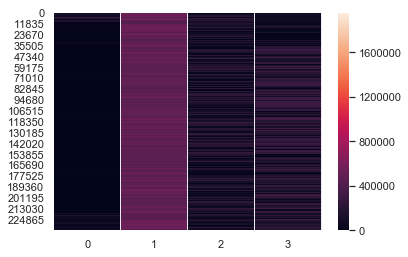

In [137]:
sb.heatmap(nonfraud[["amount","bin", "card_id", "ip_id"]].values)

In [154]:
fraud[["amount"]].values/len(fraud)

array([[ 187.82608696],
       [ 130.14492754],
       [ 434.49275362],
       [ 318.55072464],
       [ 260.57971014],
       [ 231.5942029 ],
       [ 202.60869565],
       [ 376.52173913],
       [ 376.52173913],
       [ 289.56521739],
       [ 376.52173913],
       [ 246.13043478],
       [ 347.53623188],
       [ 289.56521739],
       [ 399.71014493],
       [ 334.20289855],
       [ 298.26086957],
       [ 463.47826087],
       [ 258.44927536],
       [ 347.53623188],
       [ 466.08695652],
       [ 260.57971014],
       [ 283.76811594],
       [ 376.52173913],
       [ 556.23188406],
       [ 270.76811594],
       [ 840.28985507],
       [ 344.63768116],
       [ 956.23188406],
       [ 527.24637681],
       [ 492.50724638],
       [ 289.56521739],
       [ 376.52173913],
       [ 243.1884058 ],
       [ 231.5942029 ],
       [ 347.53623188],
       [ 631.01449275],
       [ 289.27536232],
       [ 347.65217391],
       [ 318.55072464],
       [ 579.42028986],
       [ 277.971

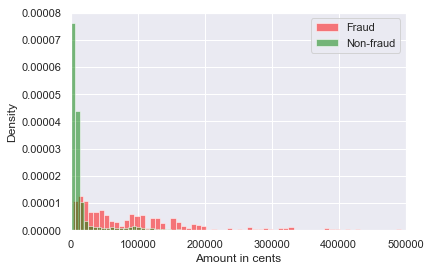

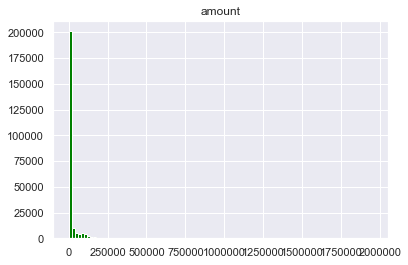

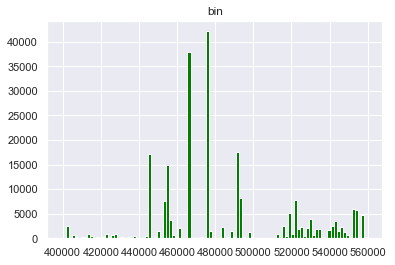

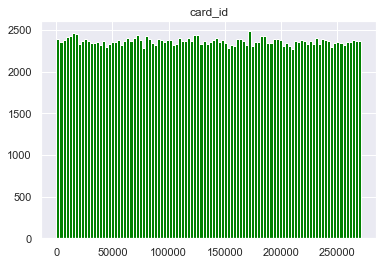

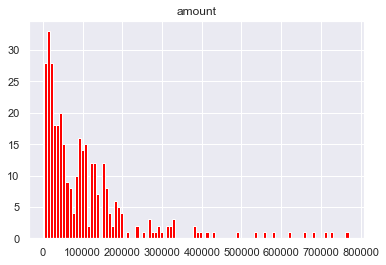

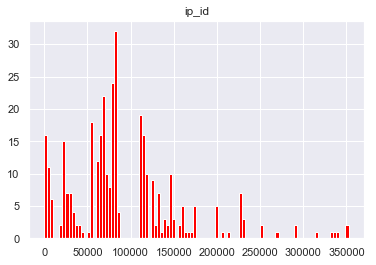

In [170]:

plt.hist(fraud[["amount"]].values, 100, facecolor="red", density=True, alpha=.5)
plt.hist(nonfraud[["amount"]].values, 300, facecolor="green", density=True, alpha=.5)
plt.xlim([0,500000])
plt.xlabel("Amount in cents")
plt.legend(["Fraud","Non-fraud"])
plt.ylabel("Density")
plt.show()

color="green"
for f in [nonfraud, fraud]:
    for k in ["amount", "bin", "card_id", "ip_id"]:
        plt.title(k)
        plt.hist(f[[k]].values, 100, facecolor=color, alpha=1)
        plt.show()
    color="red"


In [132]:
len(fraud),len(nonfraud)

(345, 236691)

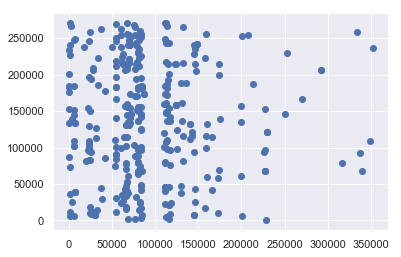

In [161]:
plt.scatter(fraud[["ip_id"]].values,fraud[["card_id"]].values)